## Pakistan House Prices - 2023
Data from: https://www.kaggle.com/datasets/manjitbaishya001/house-prices-2023/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
sns.set(style="whitegrid", palette='colorblind')
mpl.rcParams['figure.figsize'] = (10,10)

In [2]:
df = pd.read_csv('house_prices.csv', index_col = 0)

First let's have a look at data types and formats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 168445
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  int64  
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.8+ MB


In [4]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [5]:
df['city'].value_counts()

city
Karachi       37066
Lahore        26221
Islamabad     22243
Rawalpindi    11738
Faisalabad     2231
Name: count, dtype: int64

In [6]:
df['property_type'].value_counts()

property_type
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: count, dtype: int64

<Axes: xlabel='property_type', ylabel='count'>

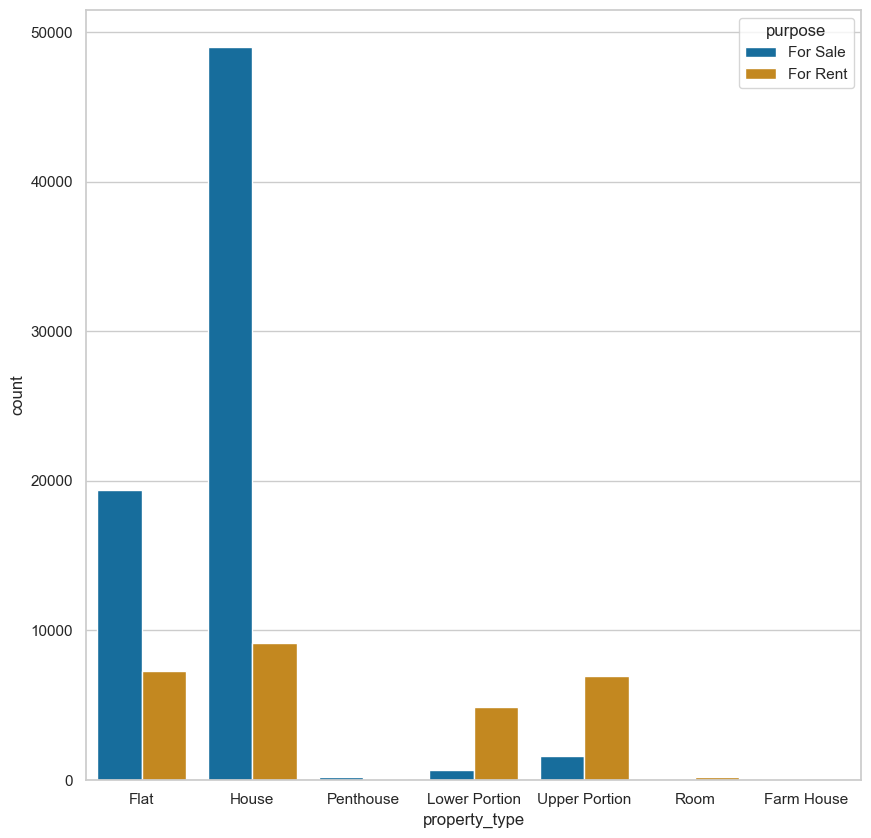

In [7]:
sns.countplot(x='property_type', hue = 'purpose', data = df)

In [8]:
df['location'].nunique()

1389

I think we will drop location, there is to many unique values

In [9]:
df = df.drop('location', axis = 1)

<Axes: xlabel='city', ylabel='count'>

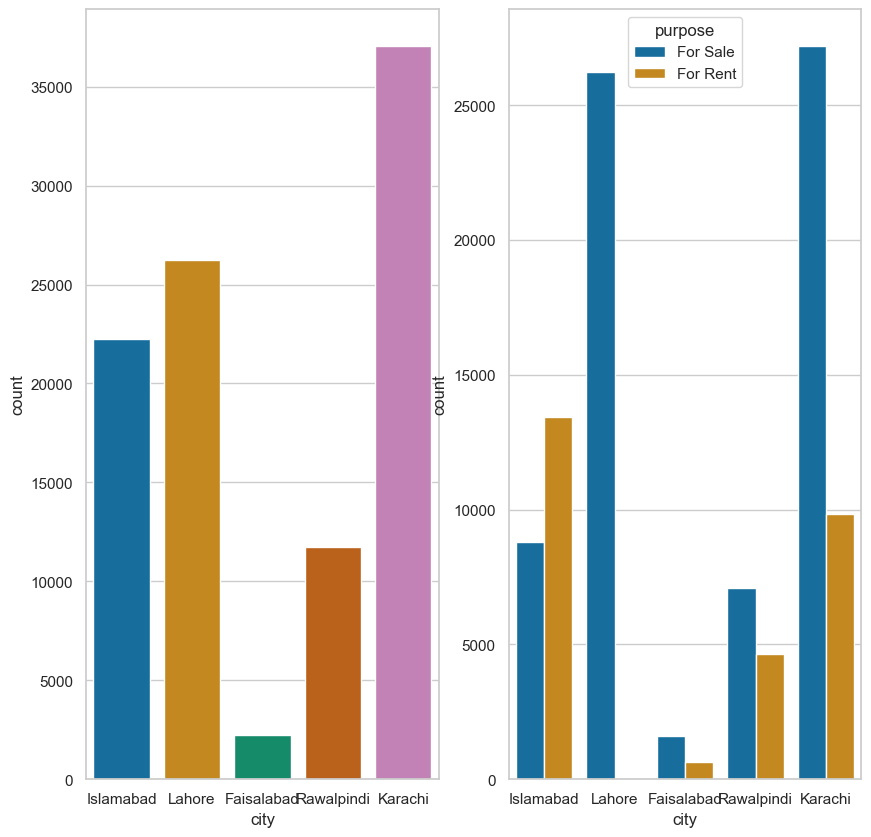

In [10]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x = "city", data = df, ax=axes[0])

sns.countplot(x='city', hue = 'purpose', data = df, ax=axes[1])

## Focusing on 'For Sale

There is no point comparing data for rent with for sale. I opted for data of properties for sale.

In [11]:
df_sale = df[df['purpose'] == 'For Sale']

<Axes: xlabel='city', ylabel='count'>

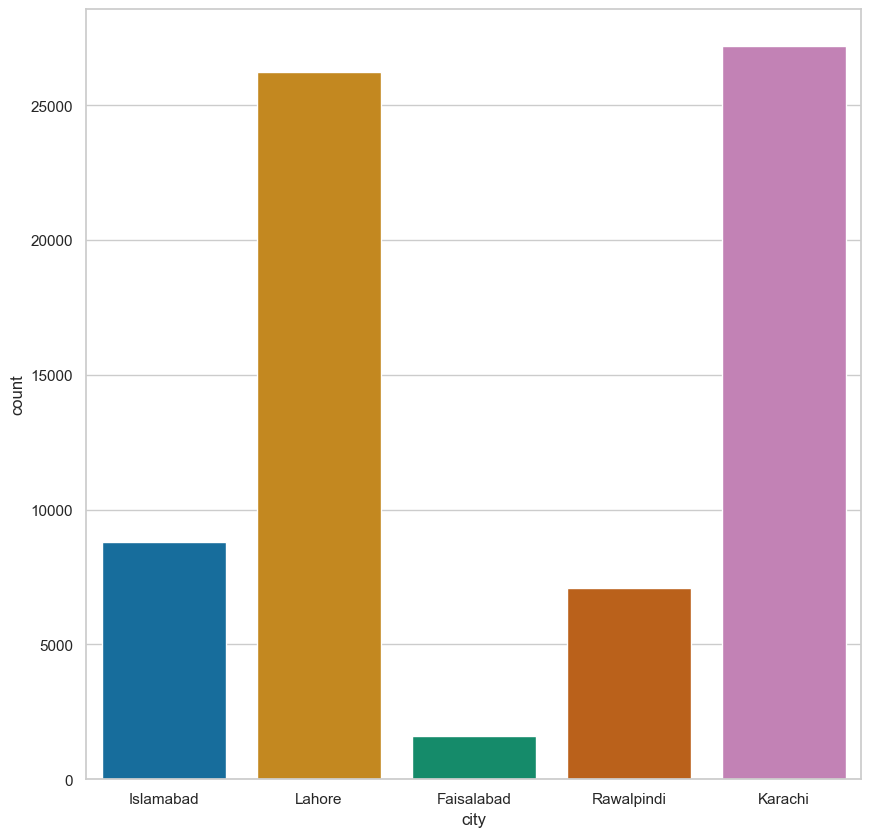

In [12]:
sns.countplot(x='city', data = df_sale)

Text(0.5, 1.0, 'Price Distribution')

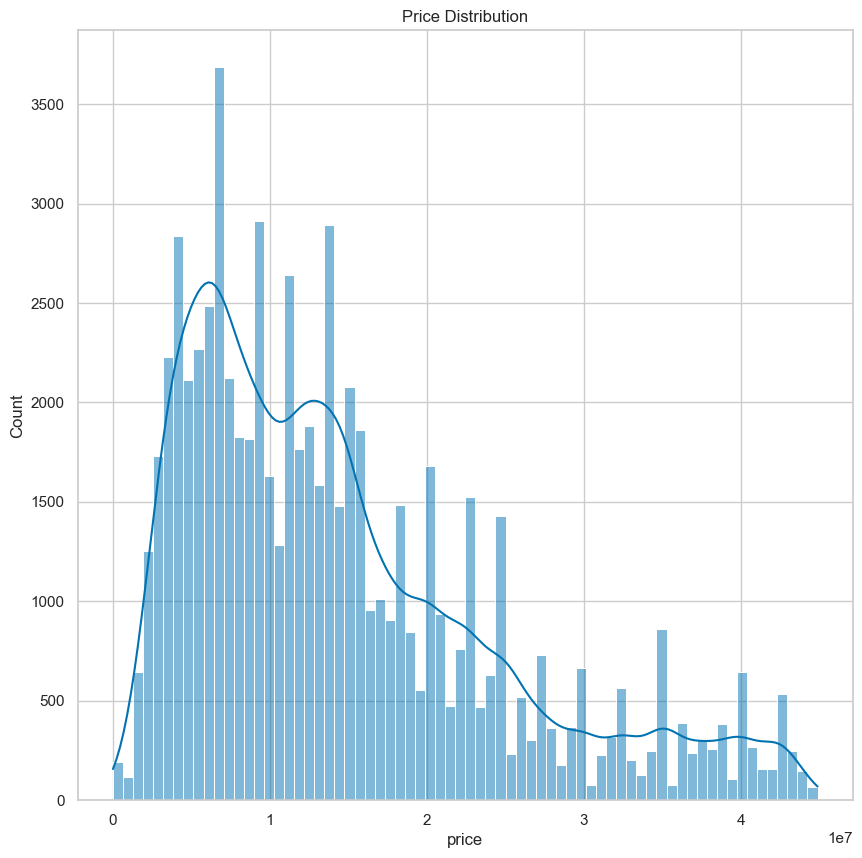

In [13]:
sns.histplot(df_sale['price'], kde=True)
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price Distribution in Different Cities')

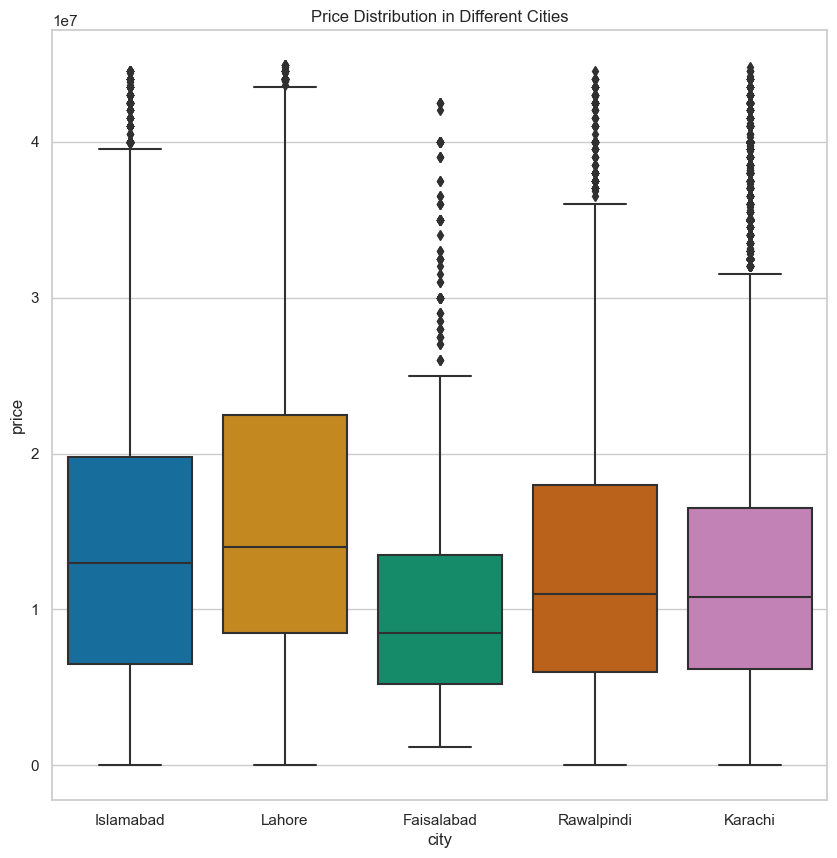

In [14]:
sns.boxplot(x='city', y='price', data=df_sale)
plt.title('Price Distribution in Different Cities')

Text(0.5, 1.0, 'Price vs. Property Type')

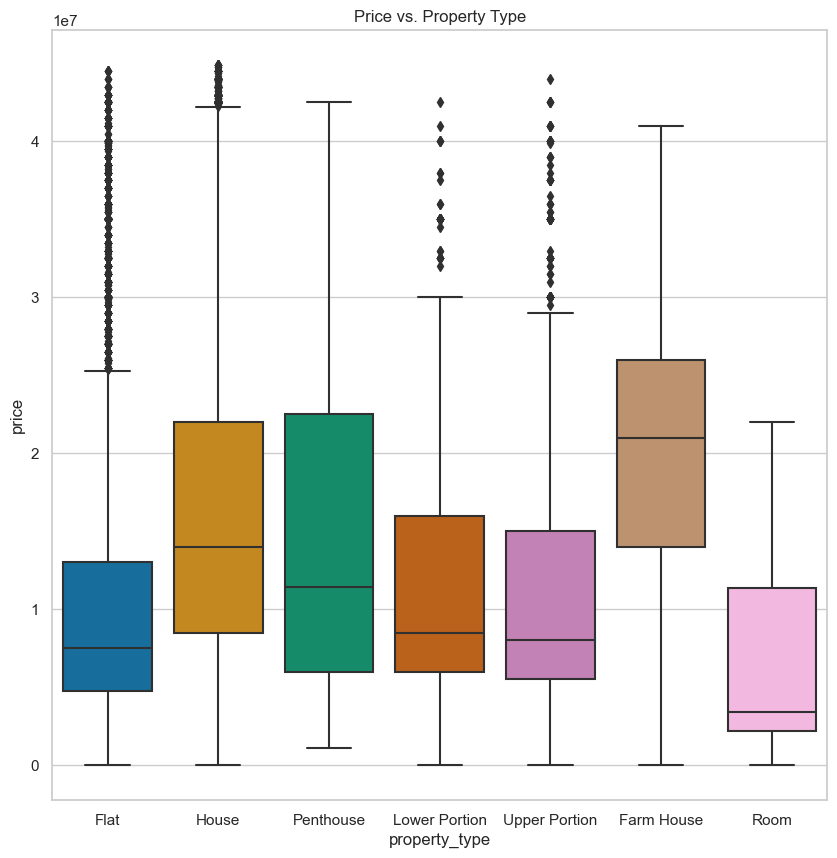

In [15]:
sns.boxplot(x='property_type', y='price', data=df_sale)
plt.title('Price vs. Property Type')

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


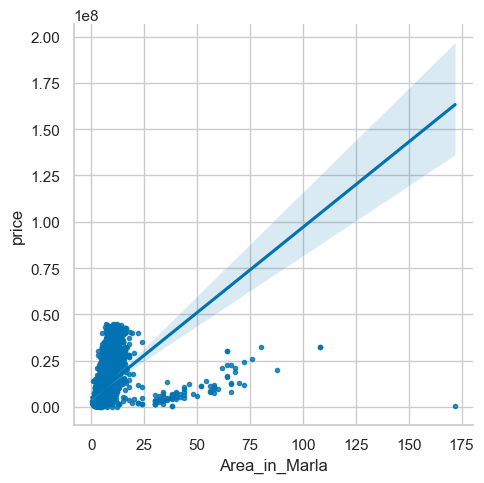

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


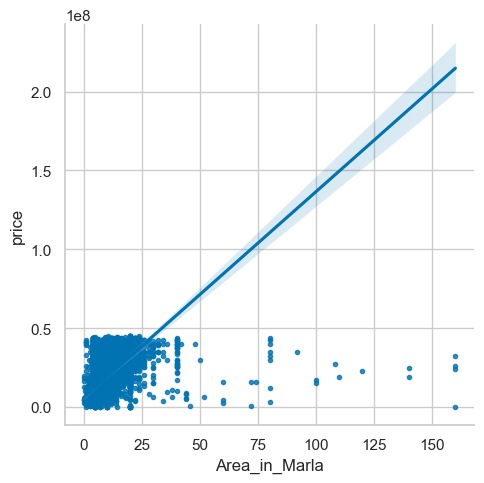

In [16]:
for i in ['Flat', 'House']:
    sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', 
               data = df_sale[df_sale['property_type'] == i])
    plt.show()

As we can see there are many really large flats and houses. I think it's a mistake. Marla equals a little more than 25 square meters. That means 50 marla = 1250 square meters. I don't believe in flats this large so we will cut flats at 15, houses at 30 Marlas.

In [17]:
df_sale_flats = df_sale[(df_sale['Area_in_Marla'] < 15) & (df_sale['property_type'] == 'Flat')]
df_sale_houses = df_sale[(df_sale['Area_in_Marla'] < 30) & (df_sale['property_type'] == 'House')]

In [18]:
df_sale_flats.describe()

,price,baths,bedrooms,Area_in_Marla
count,1.921300e+04,19213.000000,19213.000000,19213.000000
mean,1.017700e+07,2.436059,2.432259,5.612382
std,8.138725e+06,0.846073,0.780684,2.730100
min,2.300000e+04,1.000000,0.000000,0.200000
25%,4.715000e+06,2.000000,2.000000,3.800000
50%,7.500000e+06,2.000000,2.000000,4.800000
75%,1.300000e+07,3.000000,3.000000,7.300000
max,4.450000e+07,7.000000,6.000000,14.900000


In [19]:
df_sale_houses.describe()

,price,baths,bedrooms,Area_in_Marla
count,4.891500e+04,48915.000000,48915.000000,48915.000000
mean,1.631376e+07,4.148482,3.873801,7.893589
std,1.009967e+07,1.442302,1.184532,4.744229
min,1.600000e+04,1.000000,0.000000,0.000000
25%,8.500000e+06,3.000000,3.000000,5.000000
50%,1.400000e+07,4.000000,4.000000,6.100000
75%,2.200000e+07,5.000000,5.000000,10.000000
max,4.490000e+07,7.000000,6.000000,28.000000


We are left with reasonable amount of records. Let's scatterplot them with lines of linear regression.

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


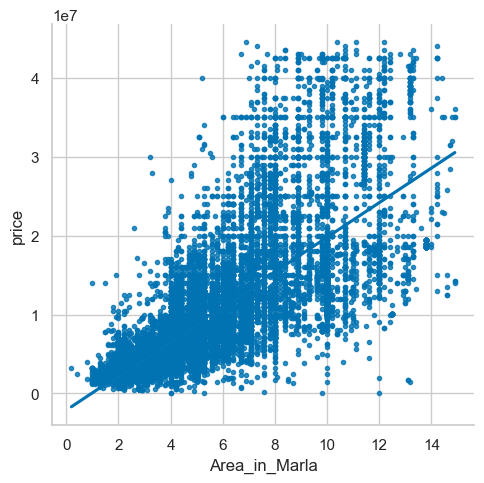

In [20]:
sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', data = df_sale_flats, ci=10)

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


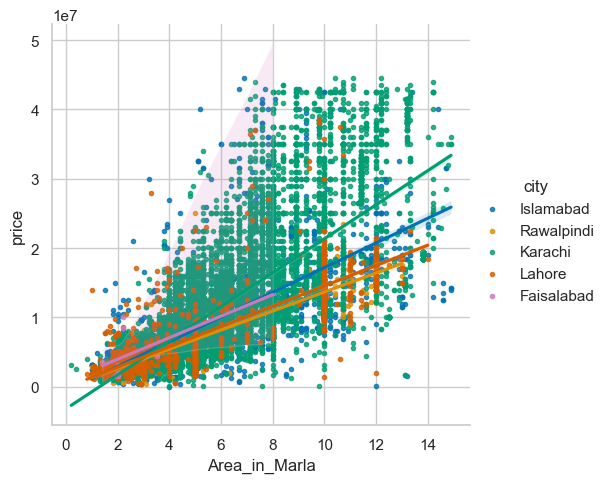

In [21]:
sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', data = df_sale_flats, hue='city')

Plot above is a little hard to read, maybe we should split it.

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


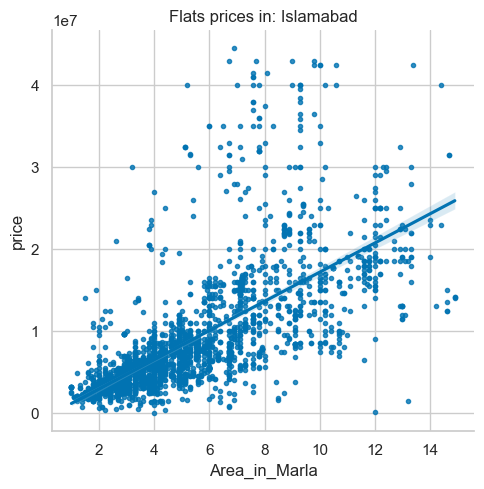

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


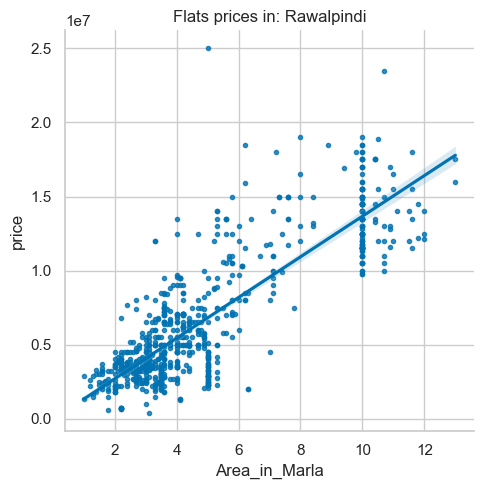

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


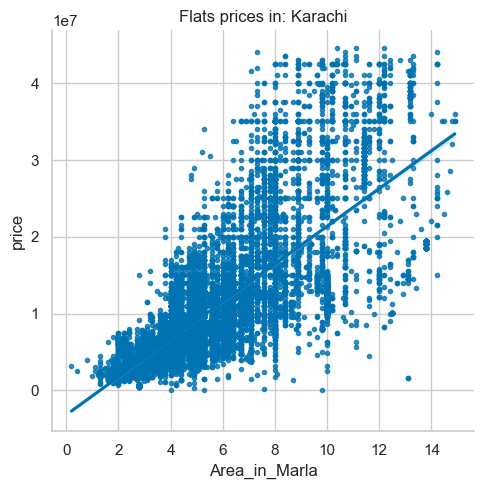

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


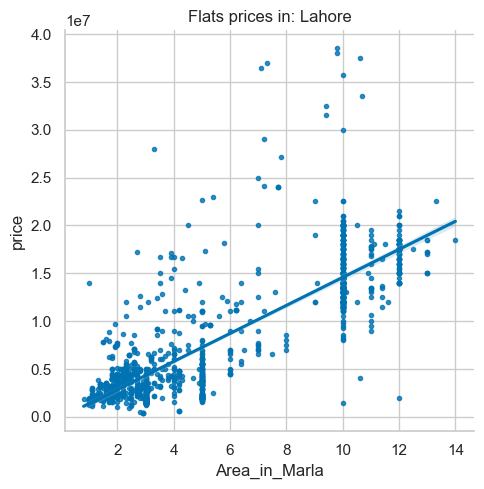

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


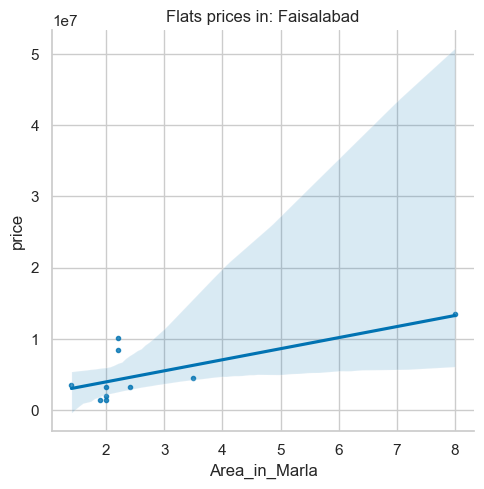

In [22]:
values = pd.Series({c: df_sale_flats[c].unique() for c in df_sale_flats})['city']

for i in values:

    sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', 
               data = df_sale_flats[df_sale_flats['city'] == i])
    
    plt.title('Flats prices in: ' + i)
    plt.show()

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


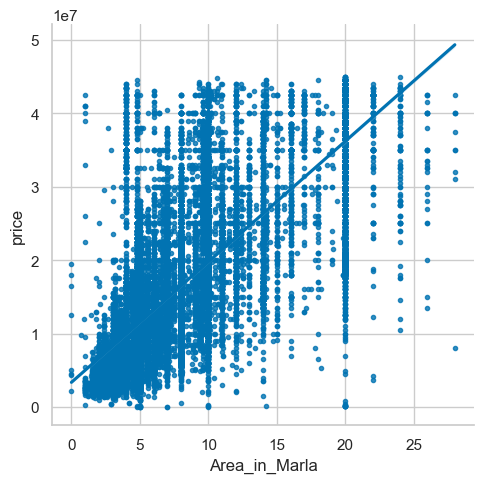

In [23]:
sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', data = df_sale_houses)

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


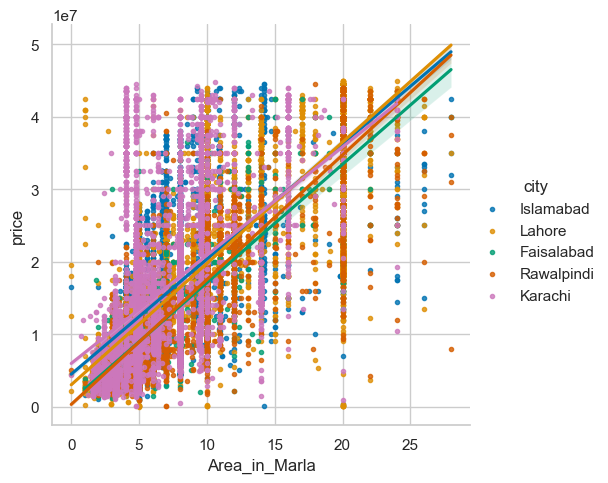

In [24]:
sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', data = df_sale_houses, hue='city')

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


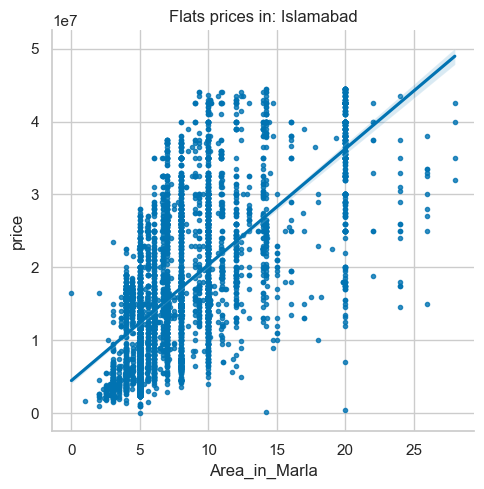

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


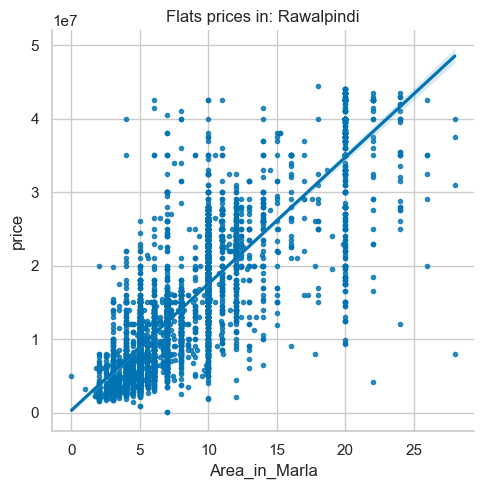

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


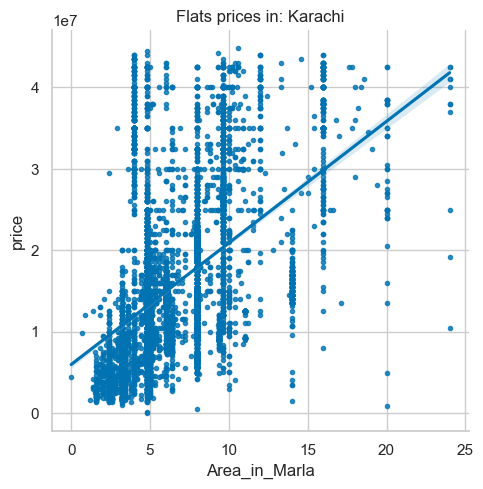

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


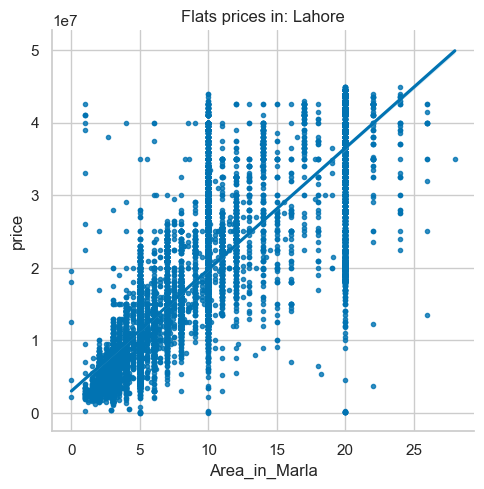

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


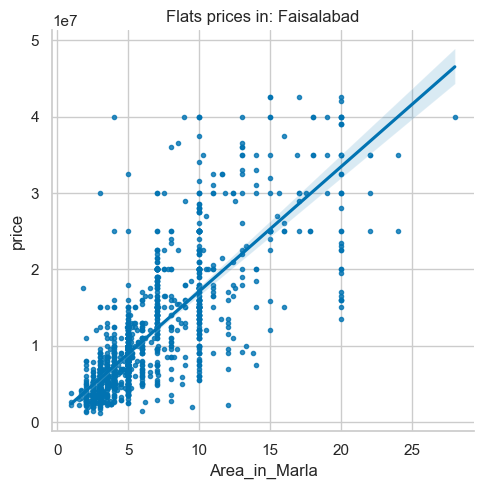

In [25]:
for i in values:

    sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', 
               data = df_sale_houses[df_sale_houses['city'] == i])
    
    plt.title('Flats prices in: ' + i)
    plt.show()